# SAC evaluation plots for RL report

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
# Functions

# compute mean and std of three given arrays
def compute_mean_std(arr1, arr2, arr3):
    all_arr = np.vstack([arr1, arr2, arr3])
    means = np.mean(all_arr, axis=0)
    stds = np.std(all_arr, axis=0)
    return means, stds

window=30
# compute the moving average of a given array
def moving_average(data, window):
    return np.convolve(data, np.ones(window)/window, mode='valid')


## Reward performance

### Performance against weak opponent

In [3]:
# load data
with open("results/Q2_fixed/report_results/SAC_fixed4_Report-BasicOpponent_weak-stat_10_1.pkl", "rb") as f:
    stats1 = pickle.load(f)
with open("results/Q2_fixed/report_results/SAC_fixed4_Report-BasicOpponent_weak-stat_10_2.pkl", "rb") as f:
    stats2 = pickle.load(f)
with open("results/Q2_fixed/report_results/SAC_fixed4_Report-BasicOpponent_weak-stat_10_3.pkl", "rb") as f:
    stats3 = pickle.load(f)

In [4]:
print(np.mean(stats1["lengths"]))

133.3767


In [5]:
episodes = np.arange(len(stats1["rewards"]))

mean_rew_weak, std_rew_weak = compute_mean_std(stats1["rewards"], stats2["rewards"], stats3["rewards"])

# compute moving average
mean_rew_weak_ma = moving_average(mean_rew_weak, window)
std_rew_weak_ma = moving_average(std_rew_weak, window)
episodes_ma = np.arange(len(mean_rew_weak_ma)) + window // 2

### Performance against strong opponent

#### from scratch

In [6]:
# load data
with open("results/Q2_fixed/report_results/SAC_fixed4_Report-BasicOpponent_strong-stat_10.pkl", "rb") as f:
    stats1 = pickle.load(f)
with open("results/Q2_fixed/report_results/SAC_fixed4_Report-BasicOpponent_strong-stat_10_2.pkl", "rb") as f:
    stats2 = pickle.load(f)
with open("results/Q2_fixed/report_results/SAC_fixed4_Report-BasicOpponent_strong-stat_10_3.pkl", "rb") as f:
    stats3 = pickle.load(f)

In [7]:
mean_rew_strong, std_rew_strong = compute_mean_std(stats1["rewards"], stats2["rewards"], stats3["rewards"])

# compute moving average
mean_rew_strong_ma = moving_average(mean_rew_strong, window)
std_rew_strong_ma = moving_average(std_rew_strong, window)
episodes_ma = np.arange(len(mean_rew_strong_ma)) + window // 2

#### continouing from checkpoint against weak opponent

In [8]:
# load data
with open("results/Q2_fixed/report_results/SAC_fixed4_Report-full-process-BasicOpponent_strong-stat_20_1.pkl", "rb") as f:
    stats1 = pickle.load(f)
with open("results/Q2_fixed/report_results/SAC_fixed4_Report-full-process-BasicOpponent_strong-stat_20_2.pkl", "rb") as f:
    stats2 = pickle.load(f)
with open("results/Q2_fixed/report_results/SAC_fixed4_Report-full-process-BasicOpponent_strong-stat_20_3.pkl", "rb") as f:
    stats3 = pickle.load(f)

In [9]:
mean_rew_strong_cont, std_rew_strong_cont = compute_mean_std(stats1["rewards"], stats2["rewards"], stats3["rewards"])

# compute moving average
mean_rew_strong_cont_ma = moving_average(mean_rew_strong_cont, window)
std_rew_strong_cont_ma = moving_average(std_rew_strong_cont, window)
episodes_ma = np.arange(len(mean_rew_strong_cont_ma)) + window // 2

### Performance self-play 
(after having trained against weak and strong opponent)

In [10]:
# load data
with open("results/Q2_fixed/report_results/SAC_fixed4_Report-full-process-self-play-stat_30_1.pkl", "rb") as f:
    stats1 = pickle.load(f)
with open("results/Q2_fixed/report_results/SAC_fixed4_Report-full-process-self-play-stat_30_2.pkl", "rb") as f:
    stats2 = pickle.load(f)
with open("results/Q2_fixed/report_results/SAC_fixed4_Report-full-process-self-play-stat_30_3.pkl", "rb") as f:
    stats3 = pickle.load(f)

In [11]:
mean_rew_self, std_rew_self = compute_mean_std(stats1["rewards"], stats2["rewards"], stats3["rewards"])

# compute moving average
mean_rew_self_ma = moving_average(mean_rew_self, window)
std_rew_self_ma = moving_average(std_rew_self, window)
episodes_ma = np.arange(len(mean_rew_self_ma)) + window // 2

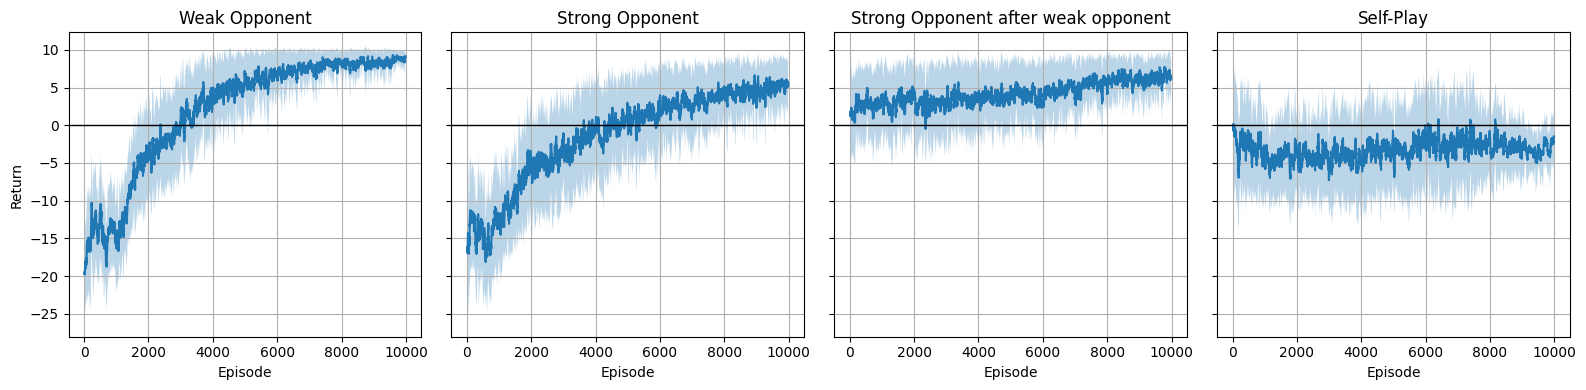

In [ ]:
# This plot was generated using Copilot
# make a plot with four subplots, one for each of the four experiments
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=True)

# Beispiel-Daten und Plot
axes[0].plot(episodes_ma, mean_rew_weak_ma)
axes[0].fill_between(episodes_ma, mean_rew_weak_ma-std_rew_weak_ma, mean_rew_weak_ma+std_rew_weak_ma, alpha=0.3)
axes[0].set_title("Weak Opponent")
axes[0].set_xlabel("Episode")
axes[0].set_ylabel("Return")

axes[1].plot(episodes_ma, mean_rew_strong_ma)
axes[1].fill_between(episodes_ma, mean_rew_strong_ma-std_rew_strong_ma, mean_rew_strong_ma+std_rew_strong_ma, alpha=0.3)
axes[1].set_title("Strong Opponent")
axes[1].set_xlabel("Episode")

axes[2].plot(episodes_ma, mean_rew_strong_cont_ma)
axes[2].fill_between(episodes_ma, mean_rew_strong_cont_ma-std_rew_strong_cont_ma, mean_rew_strong_cont_ma+std_rew_strong_cont_ma, alpha=0.3)
axes[2].set_title("Strong Opponent after weak opponent")
axes[2].set_xlabel("Episode")

axes[3].plot(episodes_ma, mean_rew_self_ma)
axes[3].fill_between(episodes_ma, mean_rew_self_ma-std_rew_self_ma, mean_rew_self_ma+std_rew_self_ma, alpha=0.3)
axes[3].set_title("Self-Play")
axes[3].set_xlabel("Episode")

for ax in axes:
    ax.grid(True)
    ax.axhline(0, color='black', linewidth=1)

plt.tight_layout()
plt.savefig("paper_plot.png", dpi=300)
plt.show()

## More detailed evaluation against weak opponent (losses...)